In [1]:
%cd ../

/home/eli/AnacondaProjects/HTFATorch


In [2]:
import logging
import numpy as np
import htfa_torch.dtfa as DTFA
import htfa_torch.niidb as niidb
import htfa_torch.utils as utils

In [3]:
%matplotlib inline

In [4]:
logging.basicConfig(format='%(asctime)s %(message)s', datefmt='%m/%d/%Y %H:%M:%S',
                    level=logging.INFO)

In [5]:
affvids_db = niidb.FMriActivationsDb('data/affvids2018.db')

In [6]:
dtfa = DTFA.DeepTFA([b for b in affvids_db.all() if 'rest' not in b.task], mask='/home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz', num_factors=100, embedding_dim=2)

09/27/2019 17:37:29 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/27/2019 17:37:46 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-03_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/27/2019 17:38:02 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-10_task-AffVids_run-01_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, smooth=6)
09/27/2019 17:38:18 Loading Nifti image /home/eli/Documents/AffVids_20180104/nifti/sub-11_task-AffVids_run-02_bold_space-MNI152NLin2009cAsym_preproc.nii.gz with mask /home/eli/Documents/AffVids_20180104/nifti/wholebrain2.nii.gz (zscore=True, sm

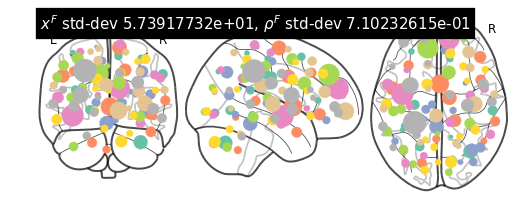

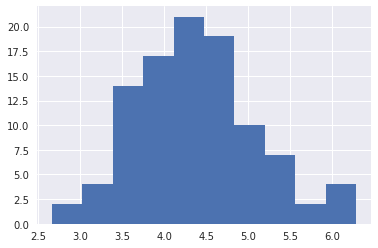

(<nilearn.plotting.displays.OrthoProjector at 0x7ff2b031c518>,
 tensor([[-3.7201e+01, -4.3315e+01,  5.9855e+01],
         [ 5.7349e+01, -2.2977e+01,  3.7334e+01],
         [-3.1087e+01, -3.7661e+01, -5.1314e+00],
         [-2.8088e+01,  3.9059e+01,  2.4368e+01],
         [ 1.5312e+01, -7.3355e+01,  4.0673e+01],
         [ 1.2586e+01,  3.1219e+01,  1.0225e+01],
         [ 3.3982e+01, -6.6035e+01, -3.4314e+01],
         [ 3.4353e+01, -2.1235e+01,  5.4166e+01],
         [-1.9355e+01, -6.0884e+01, -2.2372e-01],
         [ 1.3635e+01, -5.0759e+01,  2.2724e+01],
         [-3.4687e+01, -3.9658e+01,  2.0956e+01],
         [-2.4711e+01, -1.6996e+01,  3.5233e+01],
         [ 1.0634e+01,  1.3945e+01,  5.6238e+01],
         [ 1.7847e+00,  5.0256e+00,  3.1338e+00],
         [ 4.4328e+01,  3.3339e+01, -4.4059e+00],
         [-3.6439e+01, -6.4728e+01,  4.0465e+01],
         [ 4.4871e+01,  9.0963e+00, -2.3310e+01],
         [ 1.1799e+01, -9.5021e+00,  6.5362e+01],
         [-3.1042e+01,  2.4465e+01,  

In [7]:
dtfa.visualize_factor_embedding()

In [8]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    blocks_filter=affvids_db.inference_filter(training=True))

09/27/2019 17:55:15 [Epoch 1] (22375ms) Posterior free-energy 2.15761485e+09 = KL from prior 1.65864312e+06 - log-likelihood -2.15595571e+09
09/27/2019 17:55:15 Saving checkpoint...
09/27/2019 17:55:38 [Epoch 2] (22358ms) Posterior free-energy 2.06712870e+09 = KL from prior 1.48681650e+06 - log-likelihood -2.06564237e+09
09/27/2019 17:55:59 [Epoch 3] (21417ms) Posterior free-energy 2.00322560e+09 = KL from prior 1.35002350e+06 - log-likelihood -2.00187507e+09
09/27/2019 17:56:21 [Epoch 4] (21466ms) Posterior free-energy 1.95942246e+09 = KL from prior 1.23905538e+06 - log-likelihood -1.95818368e+09
09/27/2019 17:56:42 [Epoch 5] (21443ms) Posterior free-energy 1.92812774e+09 = KL from prior 1.14929138e+06 - log-likelihood -1.92697882e+09
09/27/2019 17:57:04 [Epoch 6] (21467ms) Posterior free-energy 1.90626931e+09 = KL from prior 1.07361562e+06 - log-likelihood -1.90519552e+09
09/27/2019 17:57:25 [Epoch 7] (21438ms) Posterior free-energy 1.88828275e+09 = KL from prior 1.00512756e+06 - log

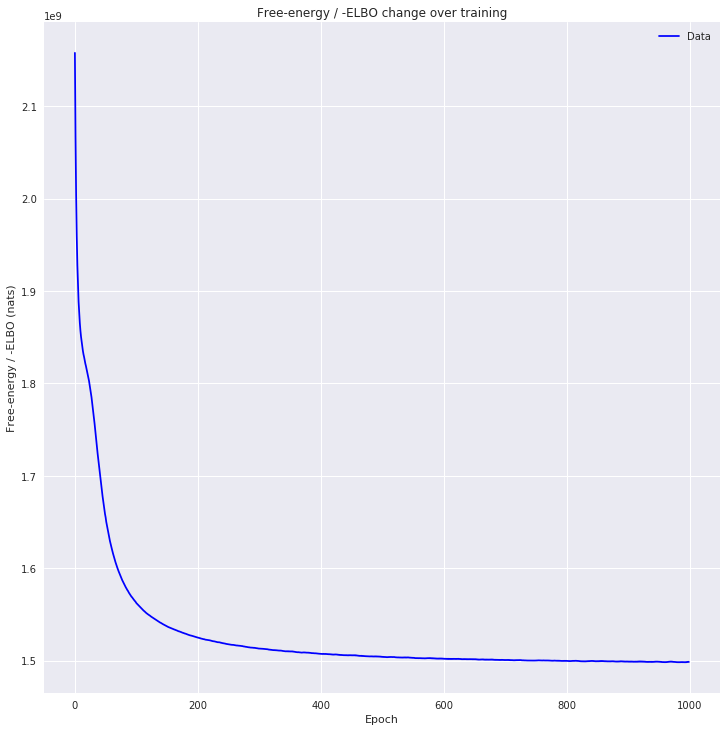

In [9]:
utils.plot_losses(losses)

In [10]:
losses = dtfa.train(num_steps=1000, learning_rate={'q': 1e-2, 'p': 1e-4}, log_level=logging.INFO, num_particles=1,
                    batch_size=25, use_cuda=True, checkpoint_steps=100, blocks_batch_size=10, patience=100,
                    train_globals=False, blocks_filter=affvids_db.inference_filter(training=False))

09/27/2019 23:52:16 [Epoch 1] (557ms) Posterior free-energy 6.97826640e+07 = KL from prior 4.17956328e+04 - log-likelihood -6.97408720e+07
09/27/2019 23:52:16 Saving checkpoint...
09/27/2019 23:52:17 [Epoch 2] (527ms) Posterior free-energy 6.83461760e+07 = KL from prior 4.11584062e+04 - log-likelihood -6.83050240e+07
09/27/2019 23:52:17 [Epoch 3] (516ms) Posterior free-energy 6.84387440e+07 = KL from prior 4.16025586e+04 - log-likelihood -6.83971440e+07
09/27/2019 23:52:18 [Epoch 4] (515ms) Posterior free-energy 6.67980520e+07 = KL from prior 4.07964766e+04 - log-likelihood -6.67572560e+07
09/27/2019 23:52:18 [Epoch 5] (513ms) Posterior free-energy 6.81197680e+07 = KL from prior 4.03758203e+04 - log-likelihood -6.80793920e+07
09/27/2019 23:52:19 [Epoch 6] (517ms) Posterior free-energy 6.66382280e+07 = KL from prior 4.01547578e+04 - log-likelihood -6.65980720e+07
09/27/2019 23:52:19 [Epoch 7] (514ms) Posterior free-energy 6.66663840e+07 = KL from prior 3.95682344e+04 - log-likelihood -6

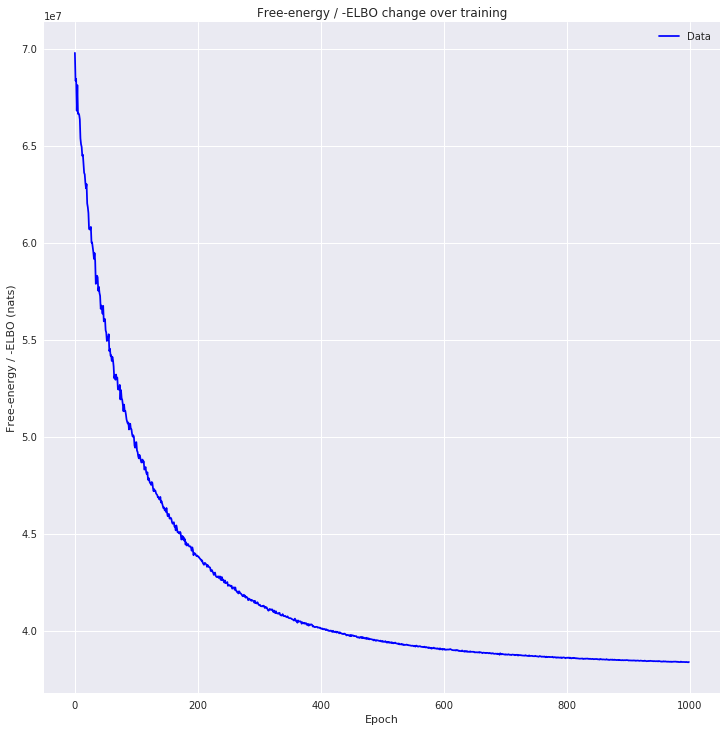

In [11]:
utils.plot_losses(losses)

In [12]:
def task_labeler(task):
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

def rest_task_labeler(task):
    if task == 'rest':
        return 'Rest'
    else:
        return 'Task'

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


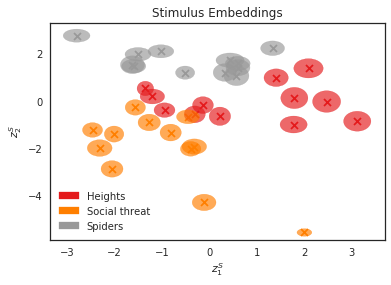

In [13]:
dtfa.scatter_task_embedding(labeler=task_labeler, figsize=None, colormap='Set1',
                            filename='affvids_norest_task_embedding.pdf')

In [14]:
def subject_labeler(subject):
    return 'Subject %d' % subject

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


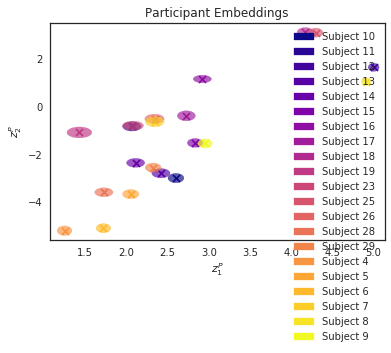

In [15]:
dtfa.scatter_subject_embedding(labeler=subject_labeler, figsize=None, colormap='plasma')

In [16]:
def block_task_labeler(b):
    task = b.task
    if 'heights' in task:
        return 'Heights'
    elif 'social' in task:
        return 'Social threat'
    elif 'spider' in task:
        return 'Spiders'
    elif 'rest' in task:
        return 'Rest'
    else:
        return None

09/28/2019 00:00:56 Plotting factors for Participant 8, run 1


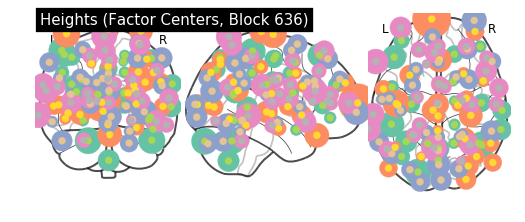

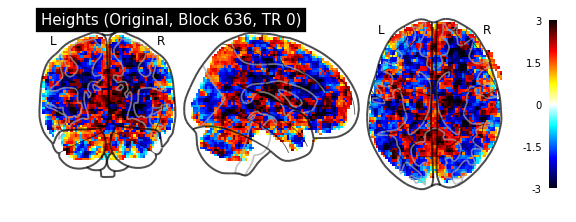

09/28/2019 00:01:00 Reconstruction Error (Frobenius Norm): 1.04749365e+03 out of 1.17510620e+03


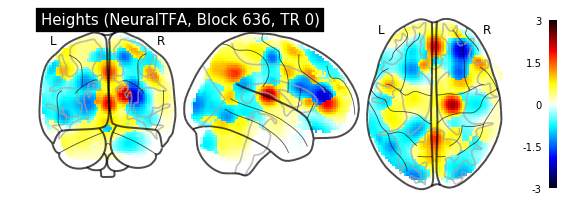

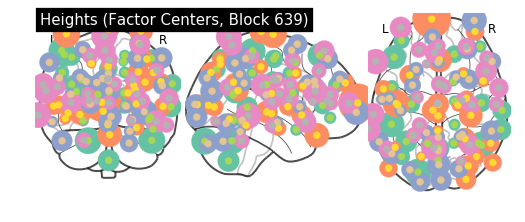

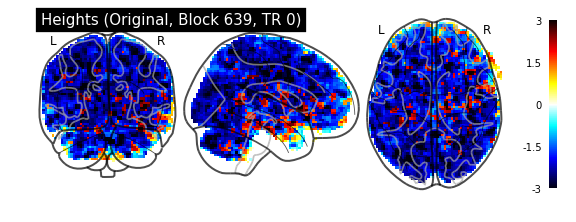

09/28/2019 00:01:05 Reconstruction Error (Frobenius Norm): 1.04697815e+03 out of 1.27647021e+03


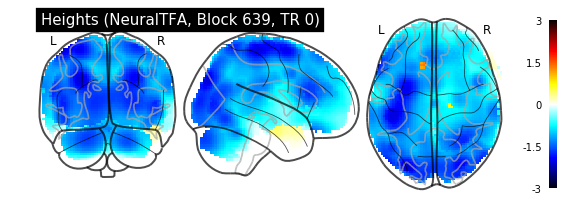

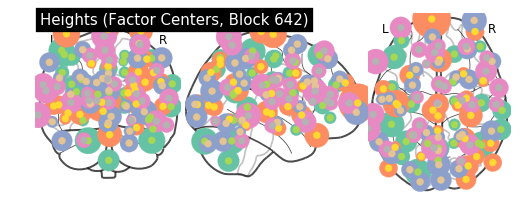

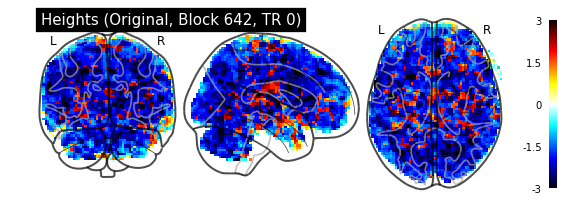

09/28/2019 00:01:10 Reconstruction Error (Frobenius Norm): 1.03013892e+03 out of 1.27404004e+03


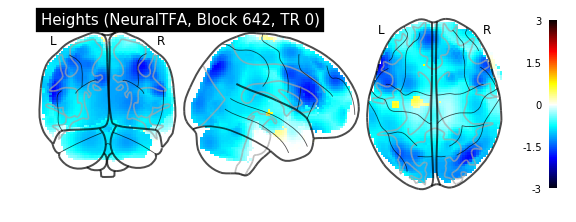

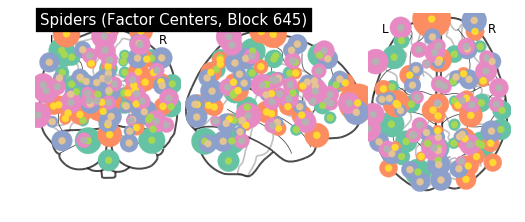

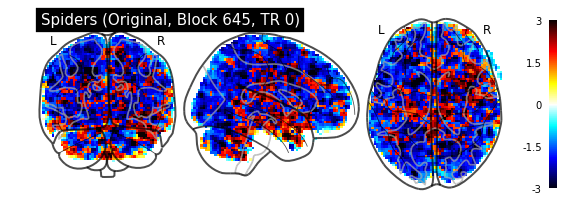

09/28/2019 00:01:15 Reconstruction Error (Frobenius Norm): 1.09850562e+03 out of 1.43289062e+03


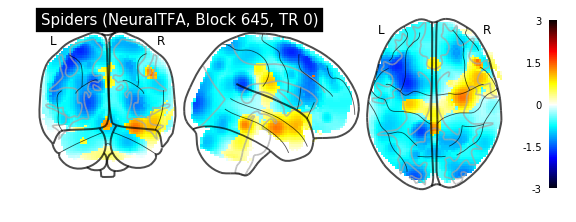

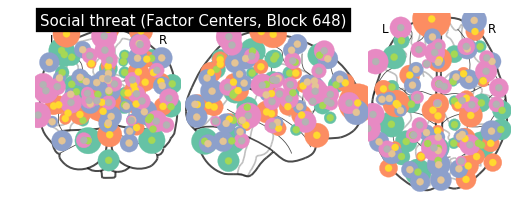

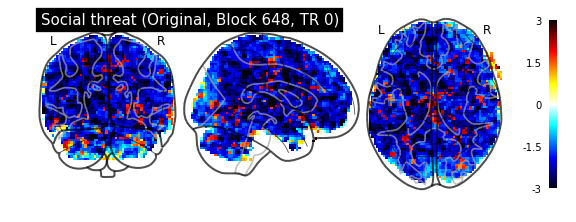

09/28/2019 00:01:20 Reconstruction Error (Frobenius Norm): 1.06902734e+03 out of 1.20007349e+03


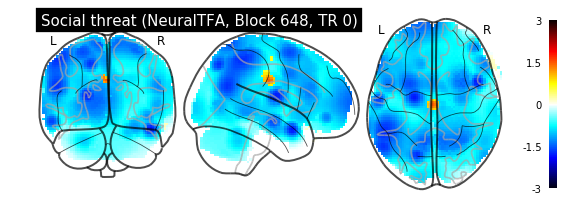

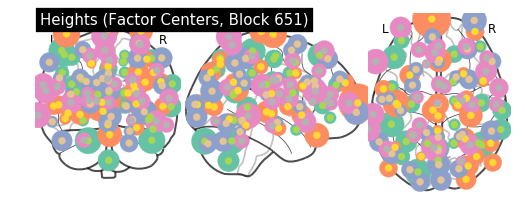

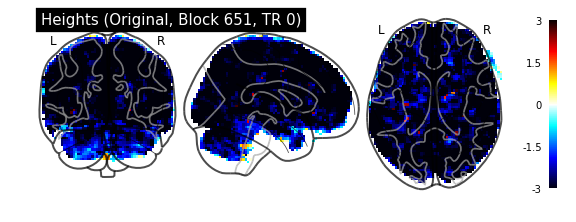

09/28/2019 00:01:24 Reconstruction Error (Frobenius Norm): 1.07387354e+03 out of 1.56189038e+03


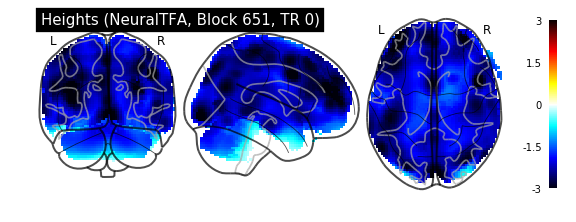

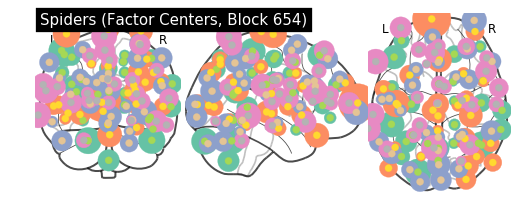

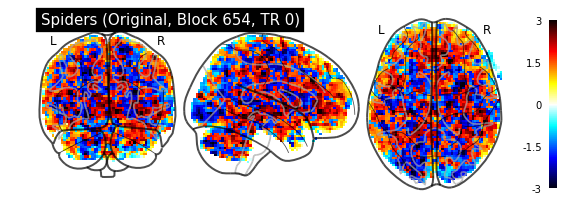

09/28/2019 00:01:29 Reconstruction Error (Frobenius Norm): 1.00118170e+03 out of 1.14822412e+03


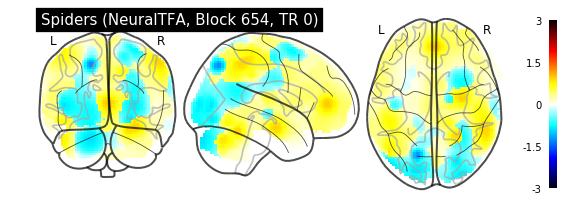

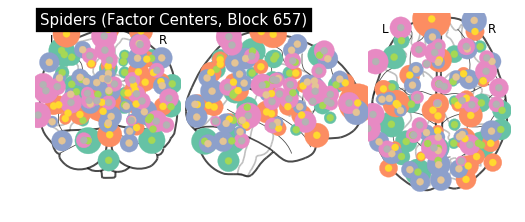

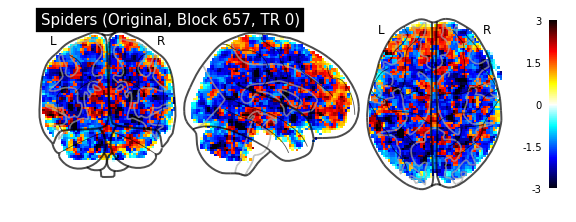

09/28/2019 00:01:34 Reconstruction Error (Frobenius Norm): 1.04250598e+03 out of 1.17921423e+03


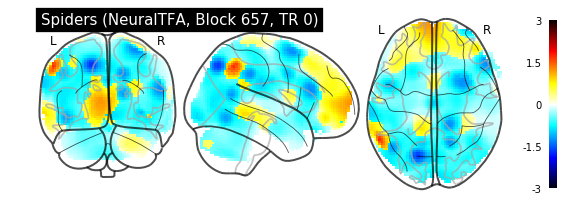

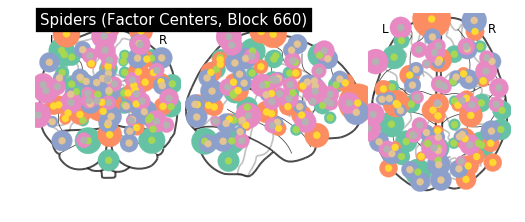

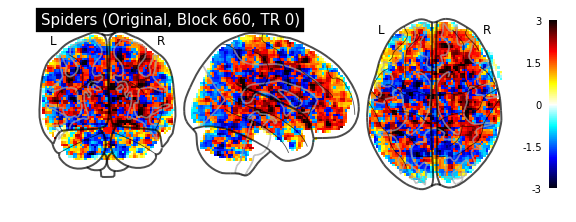

09/28/2019 00:01:39 Reconstruction Error (Frobenius Norm): 1.02181628e+03 out of 1.12361194e+03


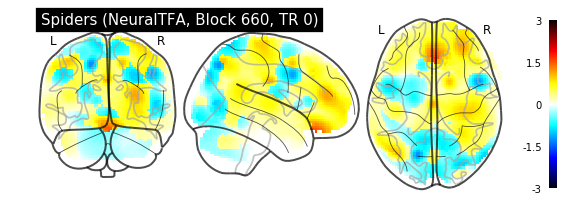

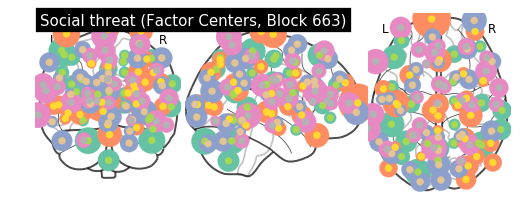

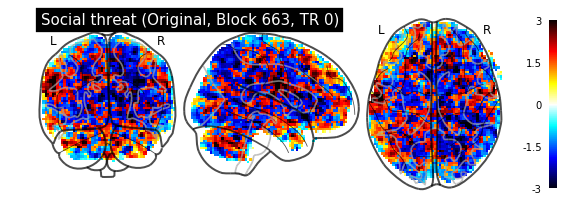

09/28/2019 00:01:44 Reconstruction Error (Frobenius Norm): 1.12603882e+03 out of 1.26998999e+03


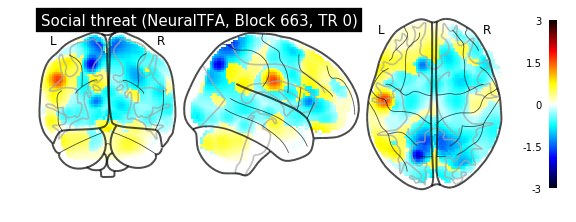

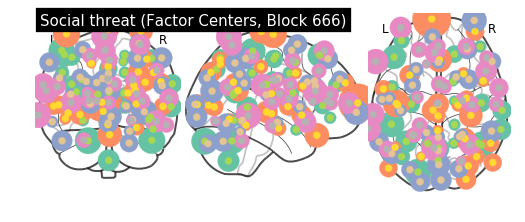

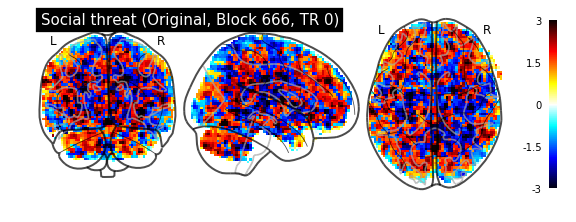

09/28/2019 00:01:49 Reconstruction Error (Frobenius Norm): 1.13966064e+03 out of 1.37587622e+03


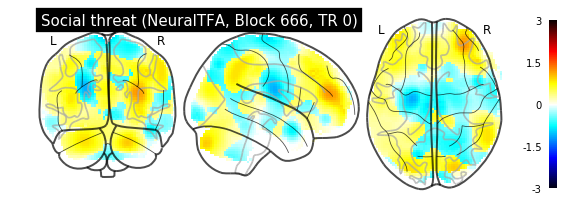

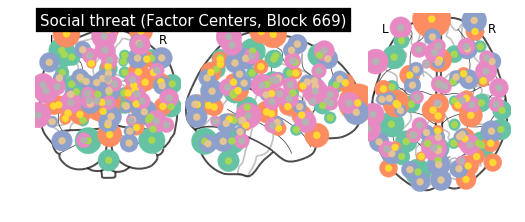

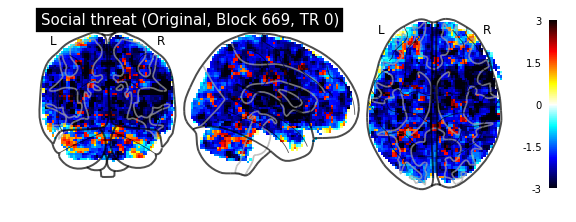

09/28/2019 00:01:54 Reconstruction Error (Frobenius Norm): 1.12963806e+03 out of 1.46233301e+03


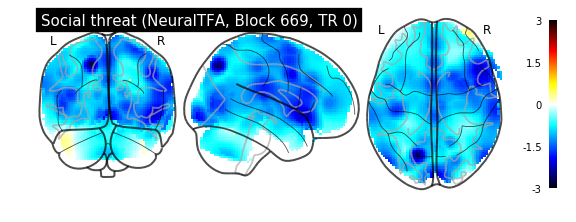

In [17]:
subject_runs = set([(block.subject, block.run) for block in dtfa._blocks])

for i in np.random.choice(range(len(subject_runs)), 1):
    subject, run = list(subject_runs)[i]
    logging.info('Plotting factors for Participant %d, run %d' % (subject, run))
    blocks = [block for block in dtfa._blocks if block.subject == subject and block.run == run]
    blocks.sort(key=lambda b: b.start_time)
    for block in blocks:
        index = dtfa._blocks.index(block)
        dtfa.plot_factor_centers(index, labeler=block_task_labeler)
        dtfa.plot_original_brain(index, labeler=block_task_labeler)
        dtfa.plot_reconstruction(index, labeler=block_task_labeler)


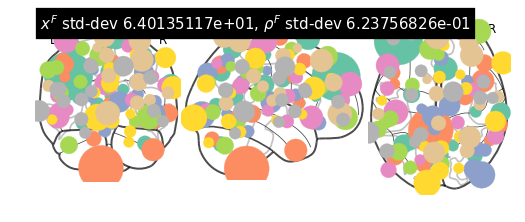

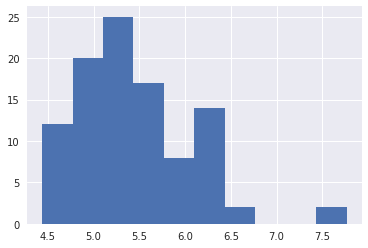

(<nilearn.plotting.displays.OrthoProjector at 0x7ff00c2f3320>,
 tensor([[-3.6829e+01, -5.8450e+01,  6.4079e+01],
         [ 6.5722e+01, -2.5151e+01,  2.6848e+01],
         [-2.7128e+01, -5.5644e+01, -1.3953e+01],
         [-4.1859e+01,  5.0427e+01,  3.5343e+01],
         [ 1.4292e+00, -7.0347e+01,  3.9797e+01],
         [ 1.6696e+00,  2.9345e+01,  1.4067e+01],
         [ 3.8602e+01, -7.0846e+01, -3.5725e+01],
         [ 3.9602e+01, -2.4125e+01,  5.8599e+01],
         [-1.1205e+01, -7.5715e+01,  5.2412e+00],
         [ 1.5753e+01, -6.0084e+01,  2.1013e+01],
         [-2.9604e+01, -5.6046e+01,  1.3894e+01],
         [-2.7923e+01, -6.1239e+00,  3.2877e+01],
         [ 7.9568e+00,  2.1105e+01,  7.5890e+01],
         [ 1.0599e+00,  1.1636e+01,  7.1047e+00],
         [ 4.8754e+01,  2.6877e+01, -1.1437e+01],
         [-4.5615e+01, -7.1307e+01,  4.7758e+01],
         [ 4.7042e+01,  8.0542e+00, -4.2255e+01],
         [ 2.8323e+01, -8.6680e+00,  7.6564e+01],
         [-4.7750e+01,  1.6850e+01,  

In [18]:
dtfa.visualize_factor_embedding()

In [19]:
dtfa.average_reconstruction_error()

09/28/2019 00:02:37 Average reconstruction error (MSE): 8.34115375e-01
09/28/2019 00:02:37 Average data norm (Euclidean): 1.00953693e+00
09/28/2019 00:02:37 Percent average reconstruction error: 0.295666


(0.8341153751949322, 1.0095369290342087, 0.0029566608823737395)

In [20]:
dtfa.average_reconstruction_error(weighted=False)

09/28/2019 00:03:15 Average reconstruction error (MSE): 1.06972974e+03 +/- 9.31849544e+01
09/28/2019 00:03:15 Average data norm (Euclidean): 1.28980564e+03 +/- 1.57811242e+02
09/28/2019 00:03:15 Percent average reconstruction error: 83.386022 +/- 5.71928904e+00


(array([1227.13586426, 1116.3581543 , 1204.29309082, 1197.35791016,
        1131.74255371, 1157.03161621, 1089.59387207, 1123.29040527,
        1166.2598877 , 1105.85070801, 1178.3782959 , 1155.04431152,
        1113.45324707, 1132.28198242, 1134.04748535, 1083.4342041 ,
        1104.38342285, 1104.7454834 , 1125.54736328, 1125.83398438,
        1098.80456543, 1144.32531738, 1142.98522949, 1130.42041016,
        1125.05444336, 1170.53540039, 1126.14404297, 1161.58190918,
        1198.40478516, 1154.66638184, 1152.33300781, 1159.82983398,
        1125.33007812, 1203.95715332, 1150.49609375, 1206.62463379,
        1026.92687988, 1106.48974609, 1049.61791992, 1072.3684082 ,
        1099.60253906, 1321.76538086, 1016.59399414, 1113.54626465,
        1091.12780762, 1147.73083496, 1235.27783203, 1010.6260376 ,
        1007.77325439,  974.31890869, 1022.31219482, 1065.98425293,
        1001.48492432, 1173.44909668, 1028.47131348,  978.07855225,
        1007.40222168, 1047.28540039,  986.68786

In [21]:
def subject_task_blocks(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label and task_labeler(b.task) == task_label:
            yield b

In [22]:
def subject_blocks(subject_label, subject_labeler=subject_labeler):
    for b in dtfa._blocks:
        if subject_labeler(b.subject) == subject_label:
            yield b

In [23]:
def subject_fear_ratings(subject_label, subject_labeler=subject_labeler):
    for b in subject_blocks(subject_label, subject_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [24]:
def subject_task_fear_ratings(subject_label, task_label, subject_labeler=subject_labeler, task_labeler=task_labeler):
    for b in subject_task_blocks(subject_label, task_label, subject_labeler, task_labeler):
        if b.individual_differences['fear_rating']:
            yield b.individual_differences['fear_rating']

In [25]:
def fear_labeler(subject, task, task_labeler=task_labeler, threshold=0.5):
    subject_ratings = [rating for rating in subject_task_fear_ratings(subject, task, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Afraid of %s' % task
        return 'Unafraid of %s' % task
    result = np.mean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [26]:
def subject_fear_labeler(subject, threshold=0.5):
    subject_ratings = [rating for rating in subject_fear_ratings(subject, lambda s: s)]
    if threshold:
        if np.mean(subject_ratings) >= threshold:
            return 'Fearful'
        return 'Not fearful'
    result = np.nanmean(subject_ratings)
    return result if not np.isnan(result) else 0.0

In [27]:
def subject_average_fear_labeler(subject):
    return subject_fear_labeler(subject, threshold=None)

In [28]:
def heights_fear_labeler(subject):
    return fear_labeler(subject, 'Heights', threshold=None)

In [29]:
def spiders_fear_labeler(subject):
    return fear_labeler(subject, 'Spiders', threshold=None)

In [30]:
def social_threat_fear_labeler(subject):
    return fear_labeler(subject, 'Social threat', threshold=None)

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


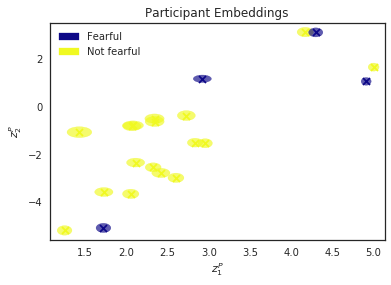

In [31]:
dtfa.scatter_subject_embedding(labeler=subject_fear_labeler, figsize=None, colormap='plasma')

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


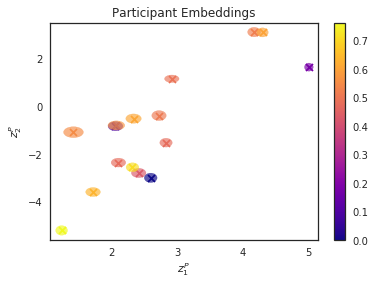

In [32]:
dtfa.scatter_subject_embedding(labeler=heights_fear_labeler, figsize=None, colormap='plasma')

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


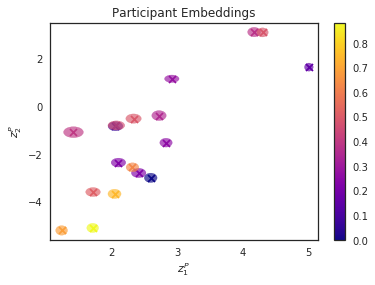

In [33]:
dtfa.scatter_subject_embedding(labeler=spiders_fear_labeler, figsize=None, colormap='plasma')

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


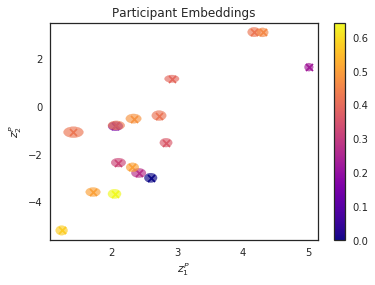

In [34]:
dtfa.scatter_subject_embedding(labeler=social_threat_fear_labeler, figsize=None, colormap='plasma')

/home/eli/anaconda3/envs/HTFATorch/lib/python3.6/site-packages/matplotlib/figure.py:445: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


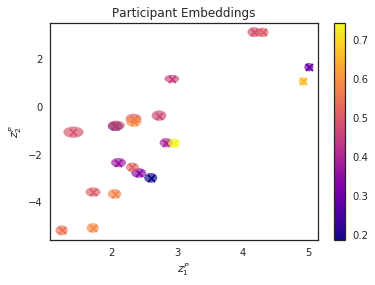

In [35]:
dtfa.scatter_subject_embedding(labeler=subject_average_fear_labeler, figsize=None, colormap='plasma',
                               filename='affvids_norest_subject_embedding.pdf')